Zofia Jankowska

##### Anomaly detection

In [2]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
from scipy.io import loadmat  
 
 
data = loadmat('ex8data1.mat')  
X = data['X']   

In [3]:
X.shape

(307, 2)

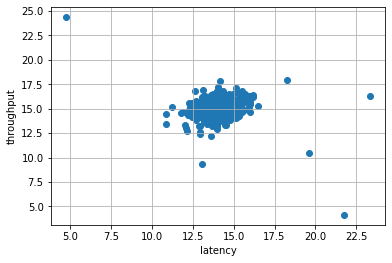

In [4]:
plt.scatter(X[:,0], X[:,1])
plt.grid()
plt.xlabel('latency')
plt.ylabel('throughput')
plt.show()

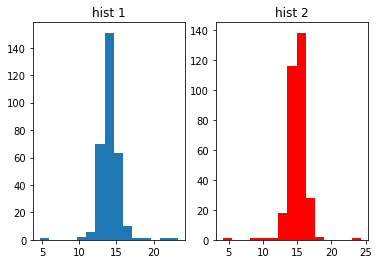

In [5]:
plt.figure()
plt.subplot(1,2,1)
plt.hist(X[:,0], bins = 15)
plt.title('hist 1')

plt.subplot(1,2,2)
plt.hist(X[:,1], bins = 15, color="red")
plt.title('hist 2')
plt.show()

##### Gaussian distribution

In [6]:
def estimate_gaussian(X):  
    mu = np.zeros((X.shape[1], 1))
    sigma2 = np.zeros((X.shape[1], 1))
    
    mu = np.mean(X.T, axis=1)
    mu = mu.reshape(mu.shape[0], -1)
    sigma2 = np.var(X.T, axis=1)
    sigma2 = sigma2.reshape(sigma2.shape[0], -1)

    return mu.tolist(), sigma2.tolist()


mu, sigma = estimate_gaussian(X)
mu, sigma

([[14.112225783945592], [14.99771050813621]],
 [[1.8326314134945172], [1.7097453308287784]])

In [7]:
Xval = data["Xval"]
yval = data["yval"]

Xval.shape

(307, 2)

In [8]:
yval.shape

(307, 1)

In [9]:
from scipy import stats

p = np.zeros((X.shape[0], X.shape[1]))
pval = np.zeros((Xval.shape[0], Xval.shape[1]))
p[:, 0] = stats.norm.pdf(X[:, 0], mu[0], np.sqrt(sigma[0]))
p[:, 1] = stats.norm.pdf(X[:, 1], mu[1], np.sqrt(sigma[1]))
pval[:, 0] = stats.norm.pdf(Xval[:, 0], mu[0], np.sqrt(sigma[0]))
pval[:, 1] = stats.norm.pdf(Xval[:, 1], mu[1], np.sqrt(sigma[1]))

#### Selecting the treshold

In [10]:
from sklearn.metrics import f1_score 

def select_threshold(pval, yval):
    thresholds = np.linspace(pval.min(), pval.max(), 1000)
    best_f1 = 0

    for th in thresholds:
        ypred = (pval[:, 0] < th) | (pval[:, 1] < th)
        new = f1_score(yval, ypred.astype(int))
        if new > best_f1:
            best_f1 = new
            best_epsilon = th
    return best_epsilon, best_f1

best_epsilon, best_f1 = select_threshold(pval, yval)
best_epsilon, best_f1

(0.0006108136634440508, 0.8750000000000001)

#### Anomaly detecion result

In [11]:
indexes = np.where((p[:, 0] < best_epsilon) | (p[:, 1] < best_epsilon))
anomalies = [X[i] for i in indexes][0]

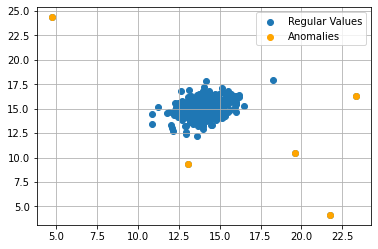

In [14]:
plt.figure()
plt.scatter(X[:,0], X[:,1])
plt.scatter(anomalies[:,0], anomalies[:,1], color="orange")
plt.grid()
plt.legend(["Regular Values", "Anomalies"])
plt.show()